 # Predicting total ride duration of taxi trips in New York City

## _**1. INTRODUCTION**_

_This is a study about the taxi trip duration prediction of New york city.The training dataset used in this project is a collection of taxi trip records. It provides valuable information about various aspects of each taxi trip, including the pickup and dropoff locations, timestamps, passenger count, and trip duration. This dataset serves as the foundation for training machine learning models to predict the trip duration based on the available features.The training data contains a set of features that can be utilized to extract insights and patterns related to taxi trips. The geographic coordinates (longitude and latitude) of the pickup and dropoff locations enable us to analyze the spatial distribution of taxi rides across the region of interest. The timestamps allow for temporal analysis, enabling us to understand the patterns and trends of taxi usage during different times of the day, days of the week, or even specific periods. Furthermore, the passenger count feature provides insights into the taxi occupancy and potential correlations between the number of passengers and the trip duration. By exploring and analyzing this training dataset, we can gain a deeper understanding of the factors influencing taxi trip durations and potentially uncover meaningful relationships among the provided features. Through the use of machine learning algorithms and techniques, we can leverage this training dataset to build predictive models that can accurately estimate the trip duration for future taxi trips. By learning from the patterns and relationships present in the training data, these models can generalize their knowledge to make predictions on unseen data. Overall, the training dataset serves as a valuable resource for developing and evaluating models that can improve the efficiency and reliability of taxi services, optimize route planning, and enhance the overall transportation experience for both passengers and drivers._

##### _Importing necessary libraries_

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from numpy import math
import warnings
warnings.filterwarnings("ignore")

##### _Importing the Dataset_

In [9]:
data=pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/train.csv")

## _**2. Exploring the Dataset**_

In [10]:
data.shape

(1048575, 11)

In [11]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

#### Column Details

Id: A unique identifier for each trip

Vendor Id: A unique identifier for vendor

Pickup Datetime: Date and time of pickup

Dropoff Datetime: Date and time of dropoff

Passenger Count: The number of passengers in the vehicle (driver entered value)

Pickup Longitude: The longitude where the meter was engaged

Pickup Latitude: The latitude where the meter was engaged

Dropoff Longitude: The longitude where the meter was disengaged

Dropoff Latitude: The latitude where the meter was disengaged

Store and Fwd Flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

Trip Duration: Duration of time in seconds

In [12]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [13]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

##### _Duplicate values_

In [14]:
# function to check null values and unique values.
def information():
 x=pd.DataFrame(index=data.columns)
 x["data type"]=data.dtypes
 x["null values"]=data.isnull().sum()
 x["unique values"]=data.nunique()
 return x

information()

,data type,null values,unique values
id,object,0,1048575
vendor_id,int64,0,2
pickup_datetime,object,0,237127
dropoff_datetime,object,0,237442
passenger_count,int64,0,10
pickup_longitude,float64,0,21382
pickup_latitude,float64,0,42587
dropoff_longitude,float64,0,30924
dropoff_latitude,float64,0,58292
store_and_fwd_flag,object,0,2


## _**3. Data Wrangling**_

#### _Converting the datatypes of pickup_datetime & dropoff_datetime_

In [15]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [16]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

##### _Adding day column in the data_

In [17]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

##### _Adding Month column in the data_

In [18]:
data['pickup_month']=pd.DatetimeIndex(data['pickup_datetime']).month
data['dropoff_month']=pd.DatetimeIndex(data['dropoff_datetime']).month

In [19]:
# calculate trip duration in minute
data["trip_duration_in_minute"]=data["trip_duration"]/60

In [20]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,trip_duration_in_minute
0,id2875421,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,7.583333
1,id2377394,1,2016-12-06 00:43:00,2016-12-06 00:54:00,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Tuesday,Tuesday,12,12,11.050000
2,id3858529,2,2016-01-19 11:35:00,2016-01-19 12:10:00,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,35.400000
3,id3504673,2,2016-06-04 19:32:00,2016-06-04 19:39:00,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Saturday,Saturday,6,6,7.150000
4,id2181028,2,2016-03-26 13:30:00,2016-03-26 13:38:00,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,7.250000


In [21]:
data.dtypes

id                                 object
vendor_id                           int64
pickup_datetime            datetime64[ns]
dropoff_datetime           datetime64[ns]
passenger_count                     int64
pickup_longitude                  float64
pickup_latitude                   float64
dropoff_longitude                 float64
dropoff_latitude                  float64
store_and_fwd_flag                 object
trip_duration                       int64
pickup_day                         object
dropoff_day                        object
pickup_month                        int64
dropoff_month                       int64
trip_duration_in_minute           float64
dtype: object

## _**4. Data Visualisation**_

In [22]:
data['passenger_count'].value_counts()

1    743132
2    151078
5     56252
3     43033
6     34700
4     20336
0        39
7         3
9         1
8         1
Name: passenger_count, dtype: int64

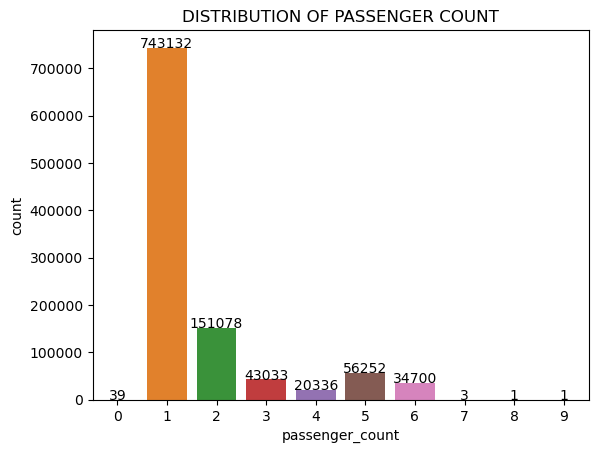

In [23]:
ax=sns.countplot(x=data['passenger_count'])
plt.title('DISTRIBUTION OF PASSENGER COUNT')

#label
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2) , 
            y=height+0.2,ha='center', s='{:.0f}'.format(height))
plt.show()

In [24]:
data['pickup_day'].value_counts()

Saturday     159756
Friday       153450
Thursday     152527
Wednesday    151238
Tuesday      146180
Sunday       145380
Monday       140044
Name: pickup_day, dtype: int64

In [25]:
data['dropoff_day'].value_counts()

Saturday     159871
Friday       153383
Thursday     152110
Wednesday    151005
Tuesday      146182
Sunday       146107
Monday       139917
Name: dropoff_day, dtype: int64

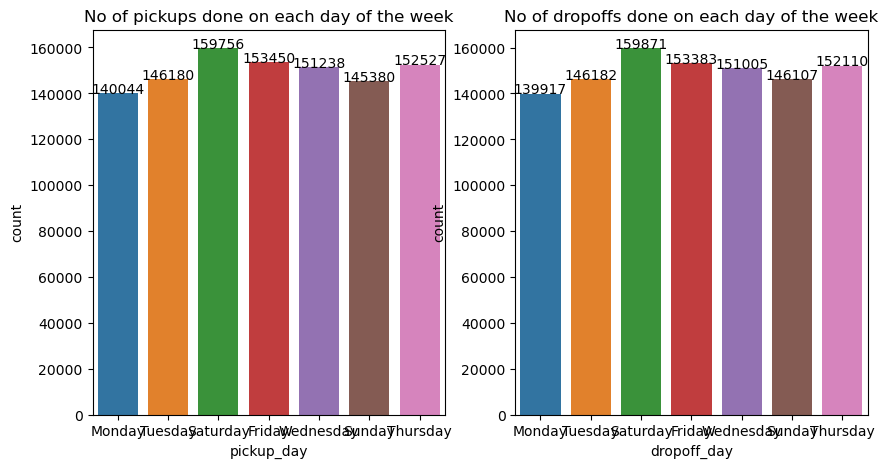

In [26]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

pt1=sns.countplot(x='pickup_day',data=data,ax=ax[0])
ax[0].set_title('No of pickups done on each day of the week')

pt2=sns.countplot(x='dropoff_day',data=data,ax=ax[1])
ax[1].set_title('No of dropoffs done on each day of the week')
#label
for p in pt1.patches:
    height=p.get_height()
    pt1.text(x=p.get_x()+(p.get_width()/2) , 
            y=height+0.2,ha='center', s='{:.0f}'.format(height))

#label
for p in pt2.patches:
    height=p.get_height()
    pt2.text(x=p.get_x()+(p.get_width()/2) , 
            y=height+0.2,ha='center', s='{:.0f}'.format(height))
    

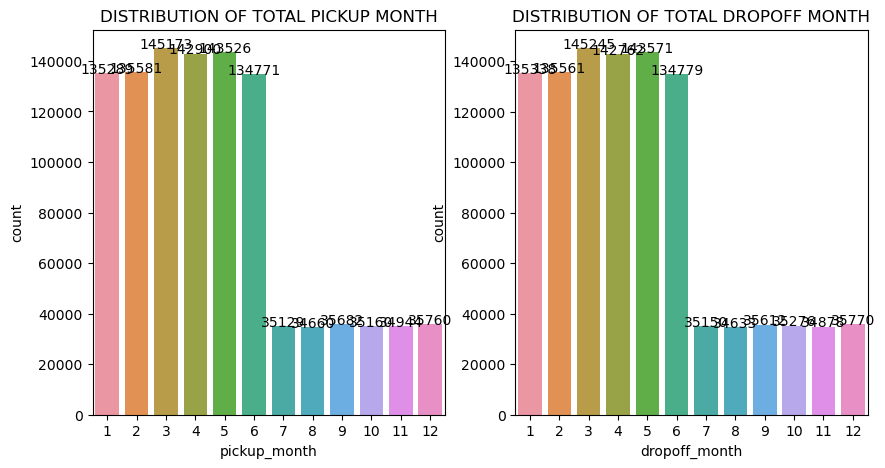

In [27]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

pt1=sns.countplot(x='pickup_month',data=data,ax=ax[0])
ax[0].set_title('DISTRIBUTION OF TOTAL PICKUP MONTH')

pt2=sns.countplot(x='dropoff_month',data=data,ax=ax[1])
ax[1].set_title('DISTRIBUTION OF TOTAL DROPOFF MONTH')
#label
for p in pt1.patches:
    height=p.get_height()
    pt1.text(x=p.get_x()+(p.get_width()/2) , 
            y=height+0.2,ha='center', s='{:.0f}'.format(height))

#label
for p in pt2.patches:
    height=p.get_height()
    pt2.text(x=p.get_x()+(p.get_width()/2) , 
            y=height+0.2,ha='center', s='{:.0f}'.format(height))
    

Text(0.5, 1.0, 'DISTRIBUTION OF DROPOFF HOURS')

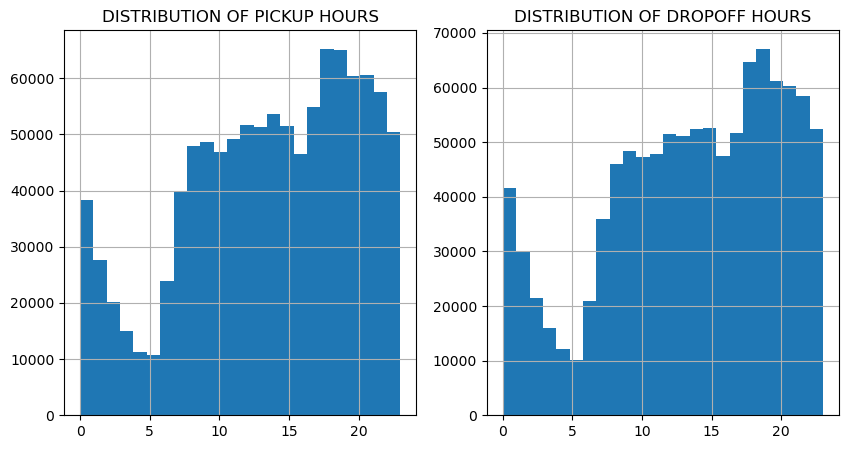

In [28]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

data['pickup_hour']=data['pickup_datetime'].dt.hour
data.pickup_hour.hist(bins=24, ax=ax[0])
ax[0].set_title('DISTRIBUTION OF PICKUP HOURS')
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data.dropoff_hour.hist(bins=24, ax=ax[1])
ax[1].set_title('DISTRIBUTION OF DROPOFF HOURS')

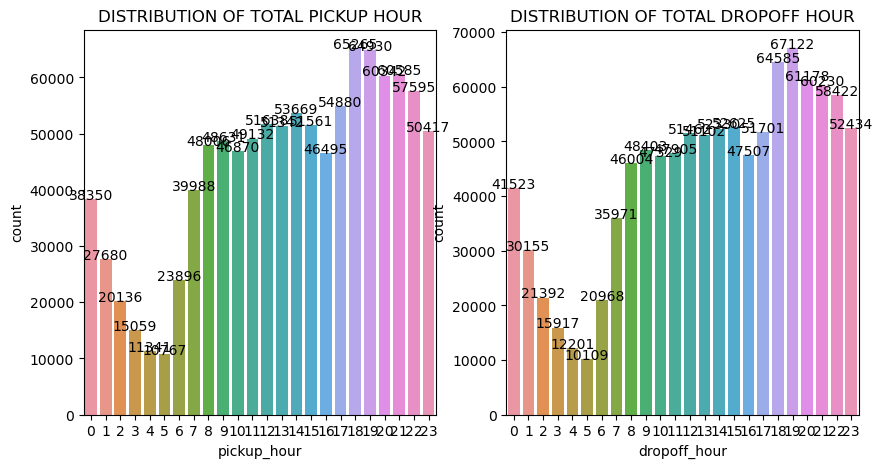

In [29]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

pt1=sns.countplot(x='pickup_hour',data=data,ax=ax[0])
ax[0].set_title('DISTRIBUTION OF TOTAL PICKUP HOUR')

pt2=sns.countplot(x='dropoff_hour',data=data,ax=ax[1])
ax[1].set_title('DISTRIBUTION OF TOTAL DROPOFF HOUR')
#label
for p in pt1.patches:
    height=p.get_height()
    pt1.text(x=p.get_x()+(p.get_width()/2) , 
            y=height+0.2,ha='center', s='{:.0f}'.format(height))

#label
for p in pt2.patches:
    height=p.get_height()
    pt2.text(x=p.get_x()+(p.get_width()/2) , 
            y=height+0.2,ha='center', s='{:.0f}'.format(height))

#### _Distribution of Trip duration_

<Axes: xlabel='trip_duration', ylabel='Density'>

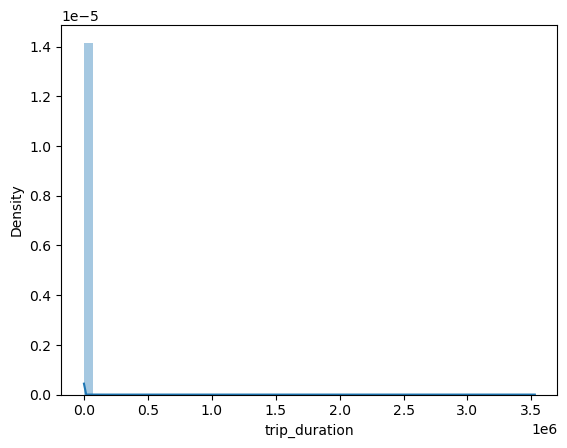

In [30]:
#trip duration distribution
x=data['trip_duration']
sns.distplot(x)

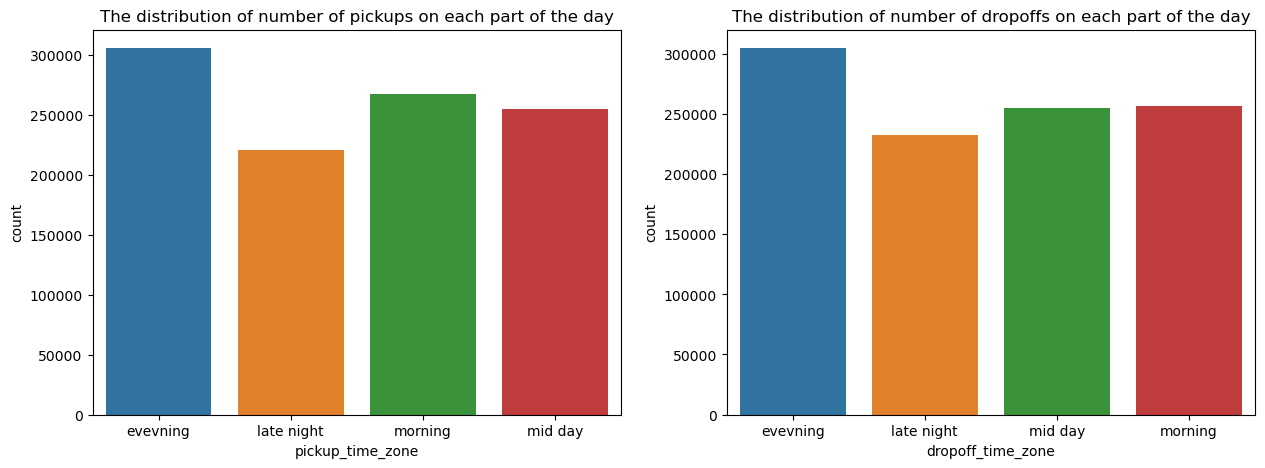

In [31]:
# diving the time in to different timezone
def timezone(x):
  if x>=5 and x<12:
    return "morning"
  elif x>=12 and x<17:
    return "mid day"  
  elif x>=17 and x<22:
    return "evevning" 
  elif x>=22 or x<5:
    return "late night"  

#apply that function
data["pickup_time_zone"]=data.pickup_hour.apply(timezone)
data["dropoff_time_zone"]=data.dropoff_hour.apply(timezone)

# Distribution of the no of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='pickup_time_zone',data=data,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_time_zone',data=data,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

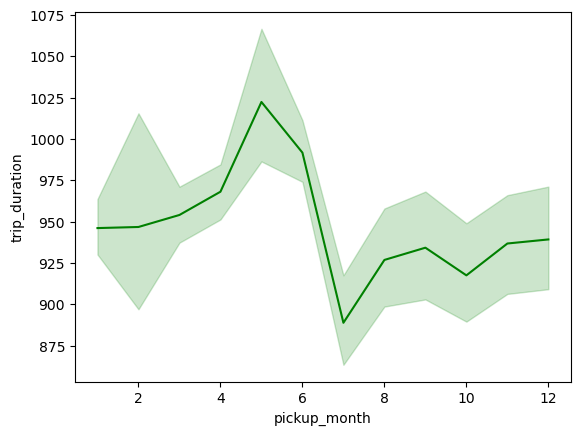

In [32]:
#Trip Duration by the month.
sns.lineplot(x='pickup_month',y='trip_duration',data=data,color='green')
plt.show()

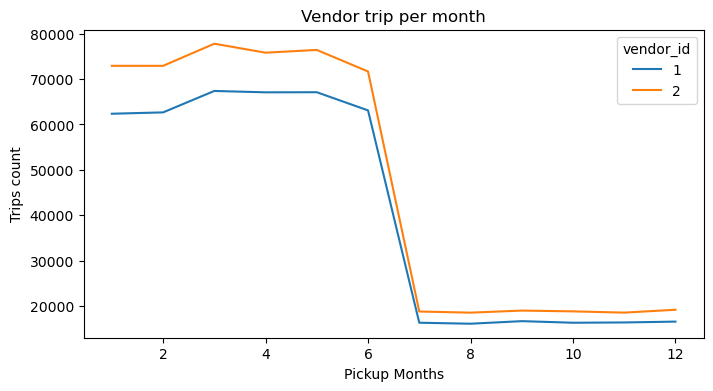

In [33]:
#aggegate vendor id by pickup month
monthly_pickup_by_vendor=data.groupby(["pickup_month","vendor_id"]).size()
monthly_pickup_by_vendor = monthly_pickup_by_vendor.unstack()

monthly_pickup_by_vendor.plot(kind = 'line', figsize = (8,4))
plt.title('Vendor trip per month')
plt.xlabel('Pickup Months')
plt.ylabel('Trips count')
plt.show()

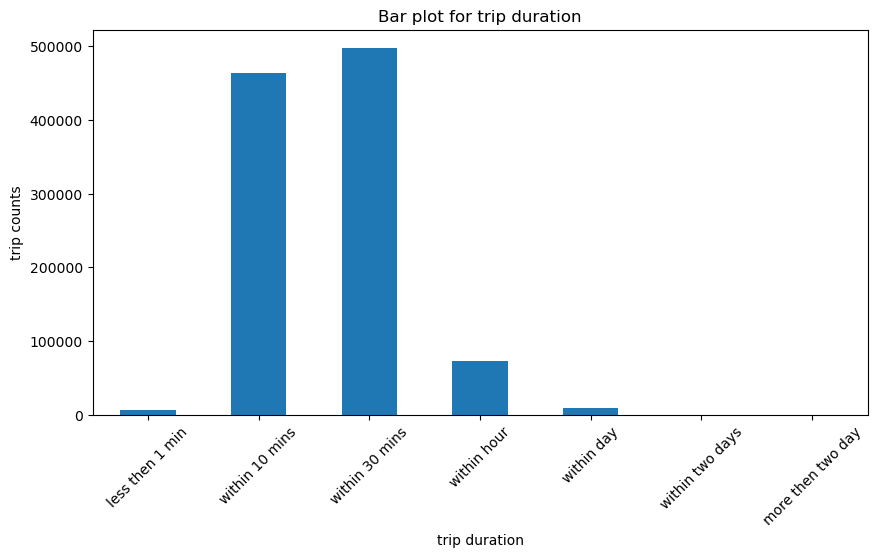

In [34]:
# divide trip duration in differnt bins 
labels=['less then 1 min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
  
plt.figure(figsize=[10,5])
data1=pd.cut(data['trip_duration_in_minute'],bins=[0,1,10,30,60,1440,1440*2,50000],labels=labels)
data.groupby(data1)['trip_duration_in_minute'].count().plot(kind='bar')
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.xlabel("trip duration")
plt.xticks(rotation=45)
plt.show()    

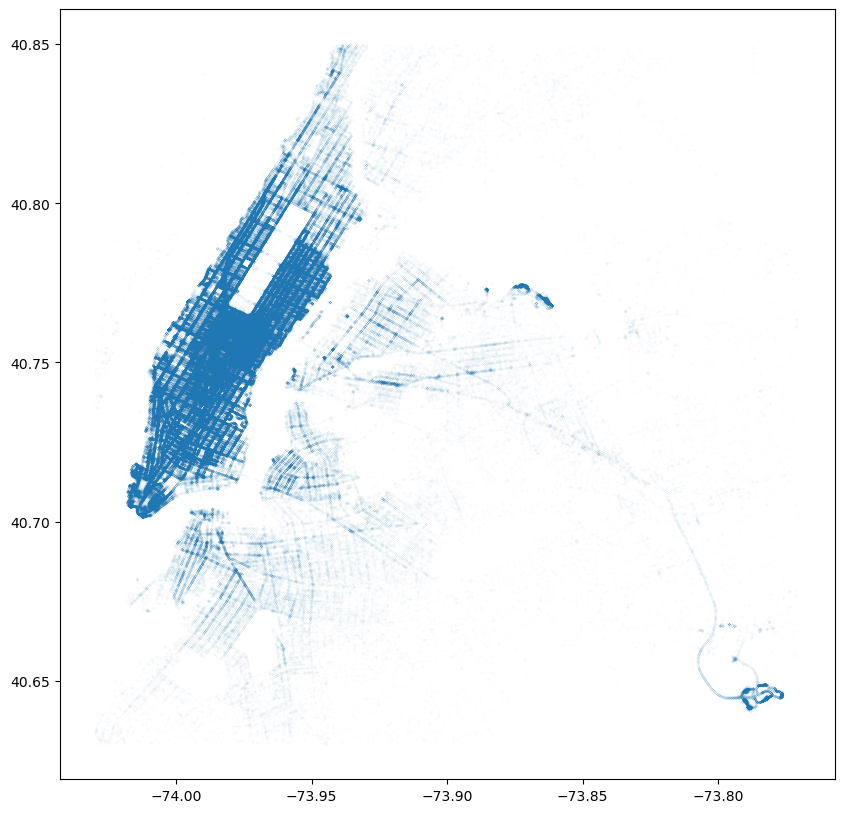

In [35]:
xlim=[-74.03,-73.77]
ylim=[40.63,40.85]
train=pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/train.csv")
train=train[(train.pickup_longitude>xlim[0]) & (train.pickup_longitude<xlim[1])]
train=train[(train.dropoff_longitude>xlim[0]) & (train.dropoff_longitude<xlim[1])]
train=train[(train.pickup_latitude>ylim[0]) & (train.pickup_latitude<ylim[1])]
train=train[(train.dropoff_latitude>ylim[0]) & (train.dropoff_latitude<ylim[1])]

longitude = list(train.pickup_longitude) + list(train.dropoff_longitude)
latitude = list(train.pickup_latitude) + list(train.dropoff_latitude)

plt.figure(figsize=(10,10))
plt.plot(longitude,latitude,'.',alpha=0.4,markersize=0.05)
plt.show()

### _Heatmap_

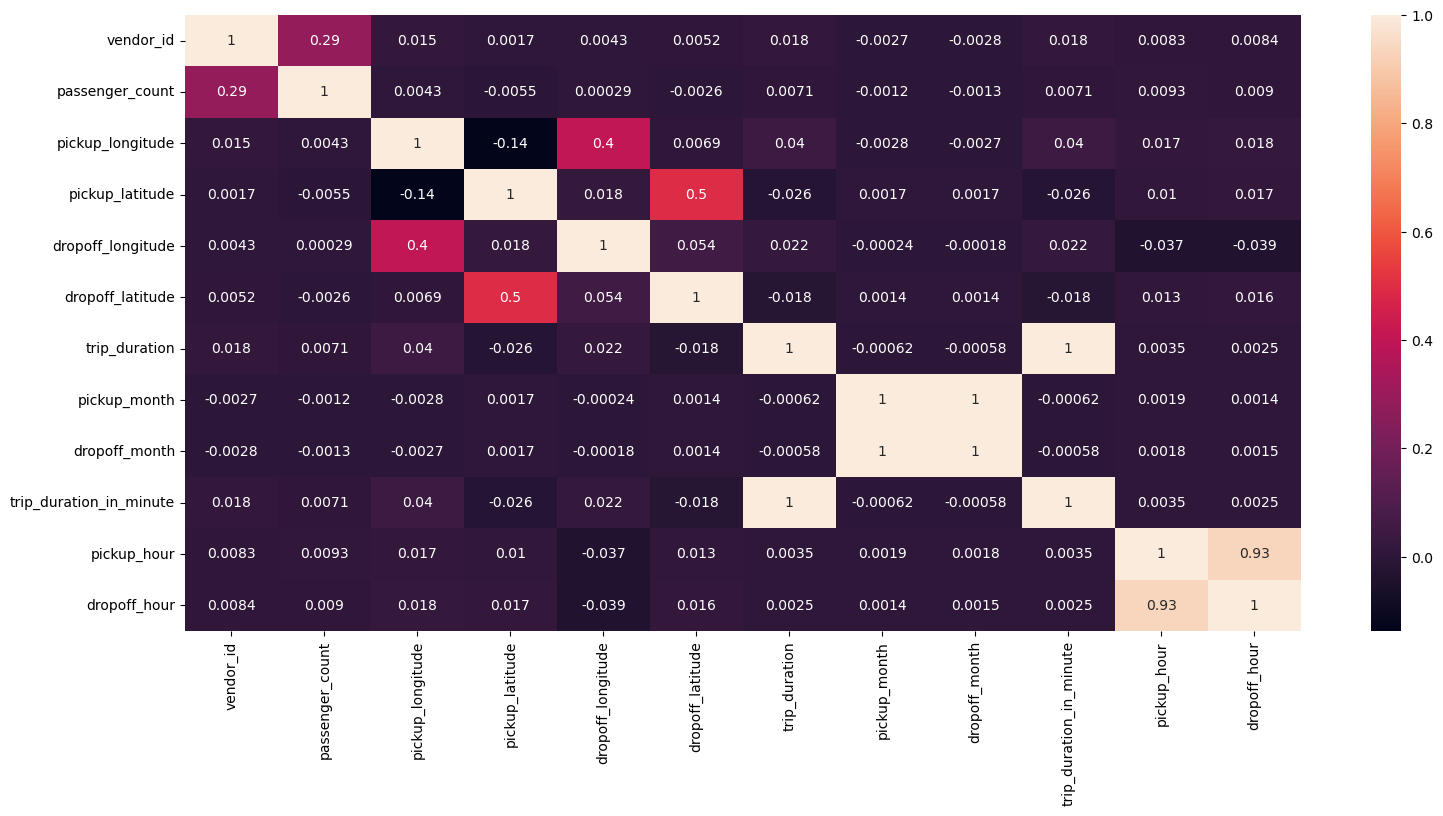

In [36]:
plt.figure(figsize=(18,8))
correlation=data.corr()
sns.heatmap(correlation,annot=True)
plt.show()

-> _By above heatmap it visulaize that pickup_month and dropp off month is 100% correlated.Along with pickup hour ,dropoff hour,pickup weekday and dropoff week day,trip duration and trip duration in minute are highly correlated._

### correlation check

In [68]:
def correlated (dataset,thresold):
  corr_column=set()    # all the highly corelated column
  for i in range(len(correlation.columns)):
      for j in range(i):
        if abs(correlation.iloc[i,j])>=thresold:  # we want absolute value
          column_name=correlation.columns[i]      # getting the name of columns
          corr_column.add(column_name)            # add he name column in empty set
  return corr_column

# Calling the function with threshold value 0.90
highly_correlated_features=correlated(df,0.90)
print('total highly correlated features:',len(set(highly_correlated_features)))


total highly correlated features: 3


In [69]:
highly_correlated_features

{'dropoff_hour', 'dropoff_month', 'trip_duration_in_minute'}

### _Checking the skewness of the target variable_

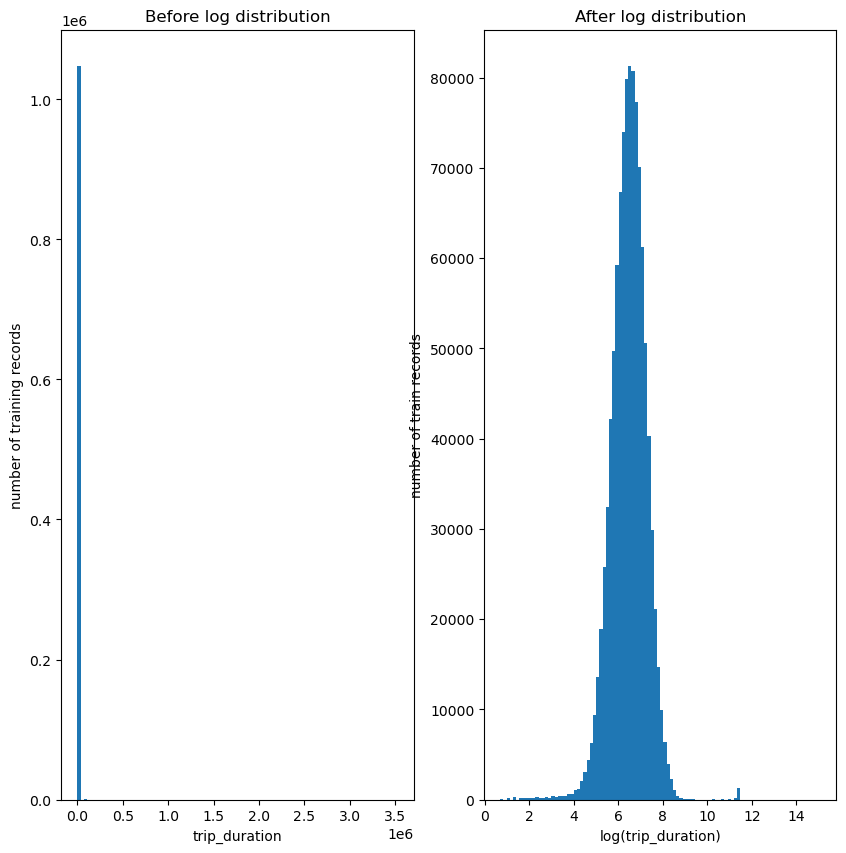

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

# check data distribution
ax[0].hist(data['trip_duration'].values, bins=100)
ax[0].set_xlabel('trip_duration')
ax[0].set_ylabel('number of training records')
ax[0].set_title('Before log distribution')

# change into log data distribution
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)
ax[1].hist(data['log_trip_duration'].values, bins=100)
ax[1].set_xlabel('log(trip_duration)')
ax[1].set_ylabel('number of train records')
ax[1].set_title('After log distribution')

plt.show()


In [76]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday
0,id2875421,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,...,0,0,0,0,1,0,0,0,0,0
1,id2377394,1,2016-12-06 00:43:00,2016-12-06 00:54:00,1,-73.980415,40.738564,-73.999481,40.731152,663,...,0,0,1,0,0,0,0,0,1,0
2,id3858529,2,2016-01-19 11:35:00,2016-01-19 12:10:00,1,-73.979027,40.763939,-74.005333,40.710087,2124,...,0,0,1,0,0,0,0,0,1,0
3,id3504673,2,2016-06-04 19:32:00,2016-06-04 19:39:00,1,-74.010040,40.719971,-74.012268,40.706718,429,...,0,0,0,0,0,1,0,0,0,0
4,id2181028,2,2016-03-26 13:30:00,2016-03-26 13:38:00,1,-73.973053,40.793209,-73.972923,40.782520,435,...,0,0,0,0,0,1,0,0,0,0


In [78]:
#data=pd.get_dummies(data,columns=['store_and_fwd_flag', 'pickup_day', 'dropoff_day'],drop_first=True)
#data=pd.get_dummies(data,columns=[ 'pickup_weekday', 'dropoff_weekday'],drop_first=True)

#print(data.head(1))
#df = pd.get_dummies(data, columns=['pickup_day', 'dropoff_day'], drop_first=True)
#df.shape
     

In [82]:
column_names=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_day_Sunday','pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','dropoff_day_Monday','dropoff_day_Saturday','dropoff_day_Sunday','dropoff_day_Thursday','dropoff_day_Tuesday','dropoff_day_Wednesday']
final_data=data[column_names]
final_data.shape

(1048575, 16)

## _**Machine learning**_

In [83]:
# define a  function to calculate evaluation metrics
def evaluation_metrics (x_train,y_train,y_predicted):
  MSE=round(mean_squared_error(y_true=y_train, y_pred=y_predicted),4)
  RMSE=math.sqrt(MSE)
  R2_score=r2_score(y_true=y_train, y_pred=y_predicted)
  Adjusted_R2_score=1-((1-( R2_score))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))

  print("Mean Squared Error:",MSE,"Root Mean Squared Error:", RMSE)
  print("R2 Score :",R2_score,"Adjusted R2 Score :",Adjusted_R2_score)
  # plotting actual and predicted values
  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((y_predicted)[:100], color='red') 
  plt.plot(np.array(y_train)[:100], color='green')
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')

  #return(MSE,RMSE,R2_score,Adjusted_R2_score)
    

x=data[column_names]
y=data["trip_duration_in_minute"]

# Importing train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## _**Linear Regression**_

In [84]:
lr=LinearRegression()
lr.fit(x_train,y_train)
a=lr.score(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

Mean Squared Error: 11182.4768 Root Mean Squared Error: 105.74723069660028
R2 Score : 0.0026620725045344296 Adjusted R2 Score : 0.00264304938955362


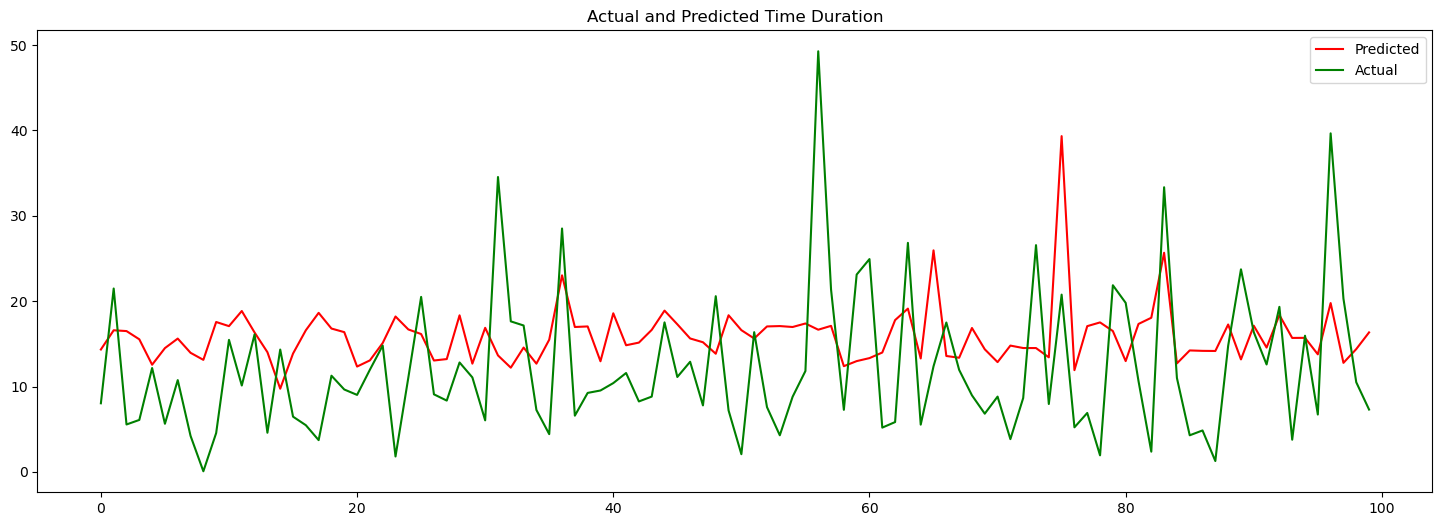

In [85]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_pred_train)

Mean Squared Error: 2717.3652 Root Mean Squared Error: 52.12835312955897
R2 Score : 0.004854893026595586 Adjusted R2 Score : 0.004778963252770496


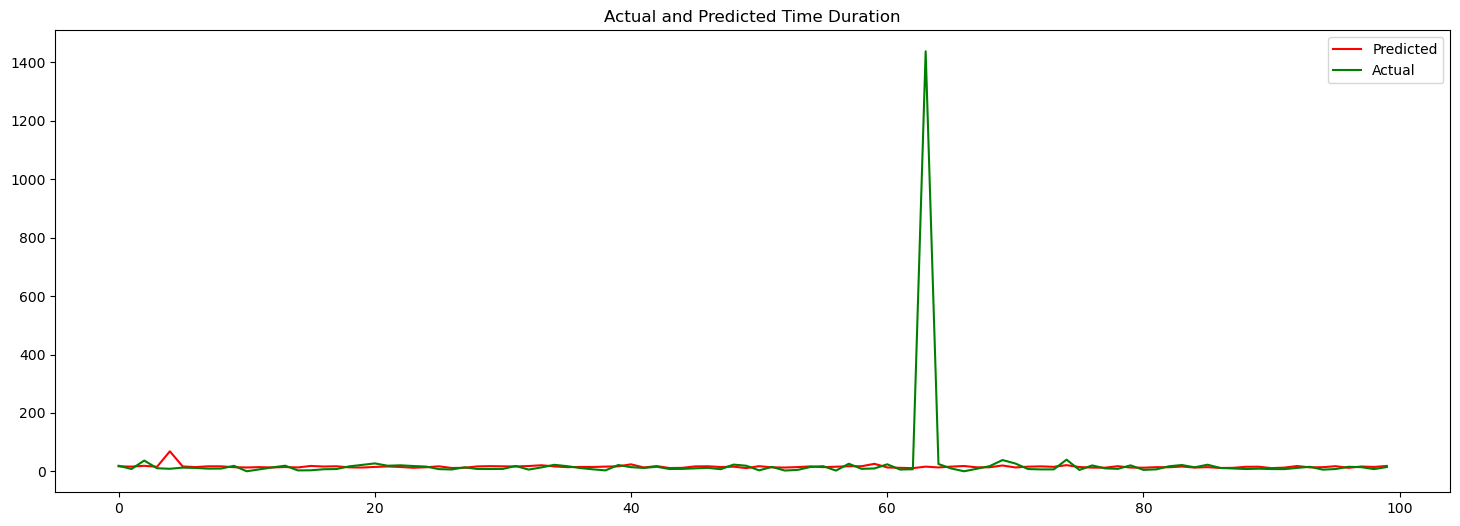

In [86]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_pred_test)